[Reference](https://syedshan85.medium.com/predictive-modelling-with-xgboost-using-telecom-data-a5f487cc40ac)

In [3]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns# Read the file
df = pd.read_csv('https://raw.githubusercontent.com/SRJaffry/XGboost/main/data_ready_ML.csv', index_col = None)

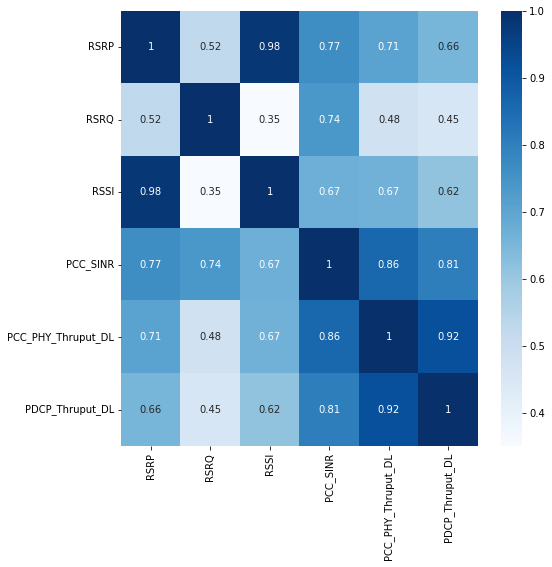

In [4]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [5]:
X = df[['RSRP', 'RSRQ', 'RSSI', 'PCC_SINR']].values
y = df['PCC_PHY_Thruput_DL'].values

# Splitting dataset: Train, Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# create an xgboost regression model
model = XGBRegressor()

# create an xgboost regression model
model = XGBRegressor(n_estimators=2000, max_depth=7, 
                     eta=0.05, subsample=0.7, colsample_bytree=0.8)

model.fit(x_train, y_train)

# make a prediction
y_pred = model.predict(x_test)

[10:14:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


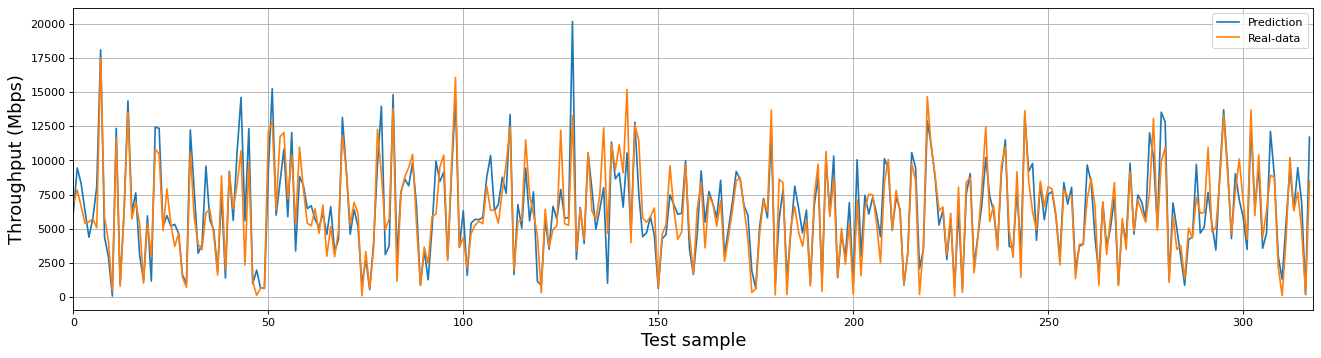

In [7]:
figure(figsize=(20, 5), dpi=80)
plt.plot(y_pred, label = 'Prediction')
plt.plot(y_test, label = 'Real-data')
plt.xlim(0,len(y_pred))
plt.legend()
plt.xlabel('Test sample', fontsize=16)
plt.ylabel('Throughput (Mbps)', fontsize=16)
plt.grid()
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE_error = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE : {}'.format(MAPE_error))

MAPE : 0.4180505336606909
